In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]


# set expansion degree
L=256

# load the initial ice and sea level data
sl0,ice0 = SL.get_sl_ice_data(L)

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

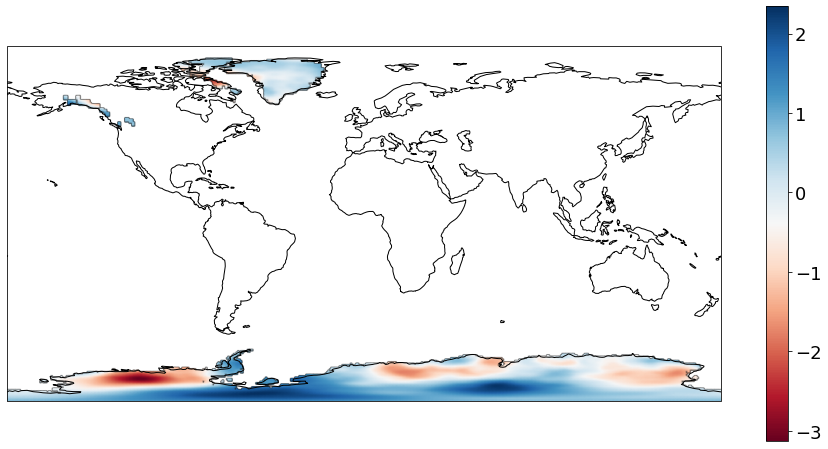

iteration =  1 relative change =  0.013038306643613034
iteration =  2 relative change =  0.0012791938657764105
iteration =  3 relative change =  0.00024915156960912736
iteration =  4 relative change =  5.604283864014834e-05
iteration =  5 relative change =  1.3506421782677702e-05
iteration =  6 relative change =  3.4352658293421314e-06
iteration =  7 relative change =  9.158408339292445e-07


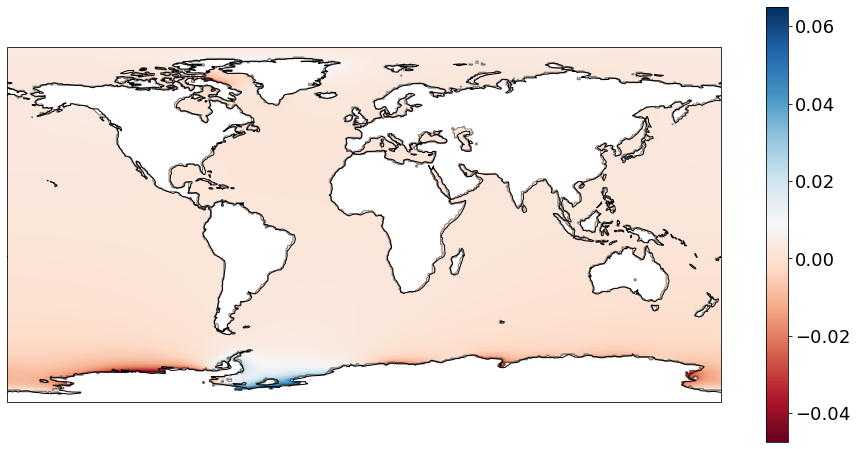

iteration =  1 relative change =  0.03288505841721224
iteration =  2 relative change =  0.007487001387617354
iteration =  3 relative change =  0.0019350123343950245
iteration =  4 relative change =  0.0005151836389818773
iteration =  5 relative change =  0.00014194453576523239
iteration =  6 relative change =  4.0419240063195445e-05
iteration =  7 relative change =  1.1847665777933881e-05
iteration =  8 relative change =  3.5579194607535588e-06
iteration =  9 relative change =  1.089270690114758e-06
iteration =  10 relative change =  3.3851399826077405e-07


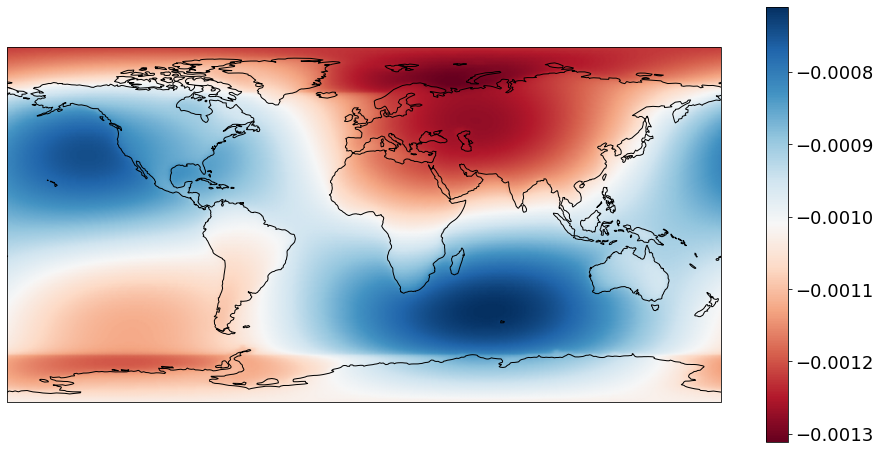

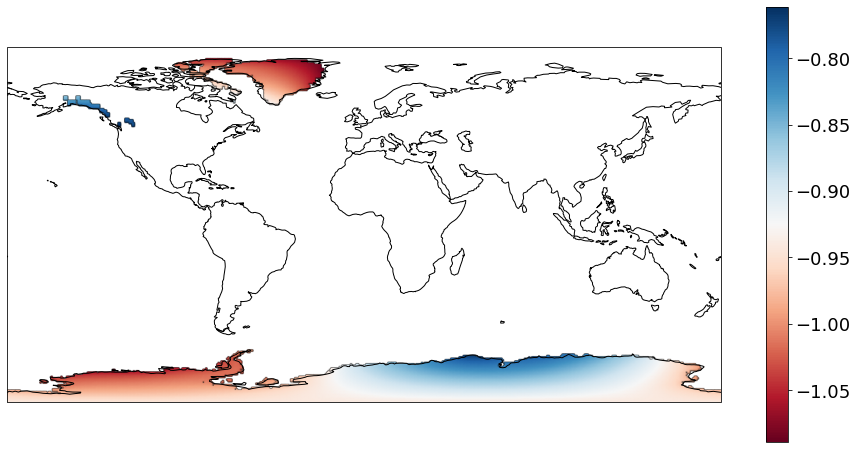

564581373043.8143 564594915337.2529 2.3986433285229344e-05


In [151]:
# set covariance for a random field
Q = SL.laplace_covariance(L,std = 1.0,s = 3,mu = 0.05) 

# build a random melt geometry
ice = SL.random_field(Q)*SL.ice_mask(sl0,ice0,val = 0.0)
                          
# plot the result with suitable mask
ice_mask = SL.ice_mask(sl0,ice0)
SL.plot(ice_mask*ice)

# solve the fingerprint problem
zeta  = SL.rhoi*(1-C)*ice
zeta_u = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ')
zeta_phi = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ')
lv = np.zeros(2)
sl,u,phi,om,psi = SL.generalised_fingerprint(C,zeta,zeta_u,zeta_phi,lv)
ocean_mask = SL.ocean_mask(sl0,ice0)
SL.plot(ocean_mask*sl)

# adjoint loads for a sea level measurement
#lat =  52.48
#lon =  1.75
#zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.sea_level_load(L,lat,lon,grid = 'GLQ',angle = 1.)

# adjoint loads for a displacement measurement
#lat =  52.48
#lon =  1.75
#zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.displacement_load(L,lat,lon,grid = 'GLQ',angle = 1.)


# adjoint loads for a potential point measurement
#lat =  52.48
#lon =  1.75
#zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.potential_load(L,lat,lon,grid = 'GLQ',angle = 1.)


#adjoint loads for a gravity measurement
#l = 2
#m = 1
#zeta_d, zeta_u_d, zeta_phi_d, kk_d = SL.potential_coefficient_load(L,l,m,remove_psi = True)

# adjoint loads for a sea surface height measurement
#lat =  52.48
#lon =  1.75
#zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.sea_surface_height_load(L,lat,lon,grid = 'GLQ',angle = 1.)

zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.sea_altimetry_load(sl0,ice0,remove_psi = True)


# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) - SL.surface_integral(zeta_u_d*u) \
       - SL.surface_integral(zeta_phi_d*(phi+psi))/SL.g - np.inner(kk_d,om)/SL.g

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)

SL.plot(sl_d)
SL.plot(SL.rhoi*(1-C)*ice_mask*sl_d)

# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)     

#phi_lm = phi.expand(normalization='ortho')
#if(m >= 0):
#    print(phi_lm.coeffs[0,l,m])
#else:
#    print(phi_lm.coeffs[1,l,-m])

   
    
print(J,J2,np.abs((J-J2)/J))
